In [1]:
import pandas as pd

In [2]:
# Load datasets from the Excel file
file_path = r"C:/Users/jagadesh/Documents/Python Scripts/assignment_upliance/Assignment.xlsx"

In [3]:
# Read each sheet into a DataFrame
user_details = pd.read_excel(file_path, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(file_path, sheet_name="OrderDetails.csv")

# Display the first few rows of each dataset
print("UserDetails:")
print(user_details.head())

print("\nCookingSessions:")
print(cooking_sessions.head())

print("\nOrderDetails:")
print(order_details.head())

UserDetails:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

CookingSessions:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad 

The Excel file has three sheets:

- UserDetails.csv
- CookingSessions.csv
- OrderDetails.csv 
- The next stage is to clean, integrate, and investigate these databases for insights.

In [4]:
# check column names and datatypes
print("\ncolumns in UserDetails:")
print(user_details.columns)

print("\ncolumns in CookingSessions:")
print(cooking_sessions.columns)

print("\ncolumns in OrderDetails:")
print(order_details.columns)

#check the shape of each dataset
print("\nshape of UserDetails:", user_details.shape)
print("\nshape of CookingSessions:", cooking_sessions.shape)
print("\nshape of OrderDetails:", order_details.shape)


columns in UserDetails:
Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')

columns in CookingSessions:
Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')

columns in OrderDetails:
Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')

shape of UserDetails: (10, 9)

shape of CookingSessions: (16, 8)

shape of OrderDetails: (16, 10)


The datasets provide the following information:

- UserDetails: Key columns include user ID, name, age, location, registration date, favorite meal, and total orders.
- CookingSessions: Key columns are Session ID, User ID, Dish Name, Meal Type, Session Start, Duration, and Rating
- OrderDetails: Key columns include the order ID, user ID, dish name, meal type, order status, amount, rating, and session ID.

The next step is to clean the data by removing duplicates, missing values, and ensuring consistency

## Data Cleaning

In [5]:
# Check for missing values in each dataset
print("\nMissing values in UserDetails:")
print(user_details.isnull().sum())

print("\nMissing values in CookingSessions:")
print(cooking_sessions.isnull().sum())

print("\nMissing values in OrderDetails:")
print(order_details.isnull().sum())


Missing values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


- The datasets are mostly clean, with the following notes:

- UserDetails and CookingSessions have no missing values. In OrderDetails, the Rating column contains two missing values.

In [6]:
# Check for duplicates
print("\nDuplicate rows in UserDetails:")
print(user_details.duplicated().sum())

print("\nDuplicate rows in CookingSessions:")
print(cooking_sessions.duplicated().sum())

print("\nDuplicate rows in OrderDetails:")
print(order_details.duplicated().sum())


Duplicate rows in UserDetails:
0

Duplicate rows in CookingSessions:
0

Duplicate rows in OrderDetails:
0


In [7]:
#Fill missing ratings with the average rating
average_rating = order_details[order_details['Order Status'] == 'Completed']['Rating'].mean()
order_details['Rating'].fillna(average_rating, inplace=True)

Handled missing in rating by replacing with mean 

In [8]:
# Rechecking for missing values in each dataset
print("\nMissing values in UserDetails:")
print(user_details.isnull().sum())

print("\nMissing values in CookingSessions:")
print(cooking_sessions.isnull().sum())

print("\nMissing values in OrderDetails:")
print(order_details.isnull().sum())


Missing values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


Merge Data to do integrated analysis, combine the datasets using the User ID and Session ID and begin exploratory analysis and visualizations.


## Merging the Datasets

In [9]:
merged_data = pd.merge(cooking_sessions, user_details, on='User ID', how='left')
final_data = pd.merge(merged_data, order_details, on='Session ID', how='left')
print(final_data.head())

  Session ID User ID_x      Dish Name_x Meal Type_x       Session Start  \
0       S001      U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S002      U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
2       S003      U003  Grilled Chicken      Dinner 2024-12-02 19:30:00   
3       S004      U001         Pancakes   Breakfast 2024-12-02 07:30:00   
4       S005      U004     Caesar Salad       Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating      User Name  Age  \
0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
1 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
2 2024-12-02 20:10:00               40             4.8    Charlie Lee   42   
3 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
4 2024-12-03 13:15:00               15             4.7    David Brown   27   

   ... Total Orders Order ID User ID_y Order Date Meal Type_y  \
0  ...         

In [10]:
final_data.head()

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Total Orders,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,12,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,8,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,15,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,12,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,10,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000


In [11]:
# Check for missing values after merging
print(final_data.isnull().sum())

Session ID           0
User ID_x            0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Order ID             0
User ID_y            0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
dtype: int64


In [12]:
#check for datatypes
print(final_data.dtypes)

Session ID                   object
User ID_x                    object
Dish Name_x                  object
Meal Type_x                  object
Session Start        datetime64[ns]
Session End          datetime64[ns]
Duration (mins)               int64
Session Rating              float64
User Name                    object
Age                           int64
Location                     object
Registration Date    datetime64[ns]
Phone                        object
Email                        object
Favorite Meal                object
Total Orders                  int64
Order ID                      int64
User ID_y                    object
Order Date           datetime64[ns]
Meal Type_y                  object
Dish Name_y                  object
Order Status                 object
Amount (USD)                float64
Time of Day                  object
Rating                      float64
dtype: object


- The combined dataset is clean and complete, with no missing information. The structure includes all essential fields from the original datasets, facilitating comprehensive analysis.

- Key columns in the merged dataset include: Session Details: Dish Name, Meal Type, Duration, and Rating; User Info: Age, Location, Registration Date, and Favorite Meal. Order details encompass the order status, amount, rating, and time of day.

##  Exploratory Data Analysis (EDA)

In [13]:
# Summary of numeric data
final_data.describe()

,Session Start,Session End,Duration (mins),Session Rating,Age,Registration Date,Total Orders,Order ID,Order Date,Amount (USD),Rating
count,16,16,16.000000,16.000000,16.000000,16,16.000000,16.000000,16,16.000000,16.000000
mean,2024-12-05 02:50:37.500000,2024-12-05 03:20:56.249999872,30.312500,4.518750,32.687500,2023-03-31 16:30:00,10.562500,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,25.000000,2023-01-15 00:00:00,5.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,2024-12-03 08:37:30,2024-12-03 08:58:45,20.000000,4.300000,28.000000,2023-02-20 00:00:00,8.000000,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,2024-12-05 00:30:00,2024-12-05 00:57:30,30.000000,4.550000,30.500000,2023-03-10 00:00:00,10.000000,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,2024-12-06 23:22:30,2024-12-07 00:00:00,40.000000,4.725000,35.750000,2023-05-22 00:00:00,12.500000,1012.250000,2024-12-06 06:00:00,13.125000,4.464286
max,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,42.000000,2023-08-11 00:00:00,15.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,NaN,NaN,10.873324,0.292617,5.839164,NaN,3.119161,4.760952,NaN,2.435843,0.436436


Next steps:

- Establish the connection between cooking sessions and orders.
  
- Identify popular dishes based on their frequency and ratings.

- Examine demographic influences on user behavior.

- Create visuals to derive insights.ghts.

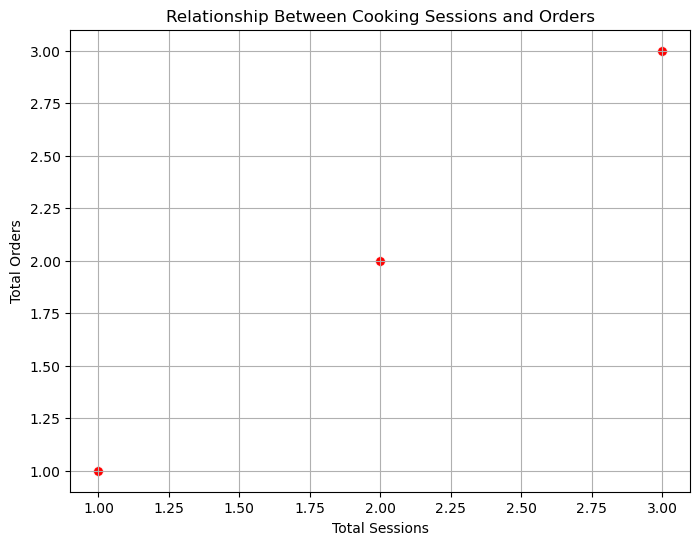

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between cooking sessions and user orders
session_order_analysis = final_data.groupby('User ID_x').agg({
    'Session ID': 'nunique',  # Number of unique sessions
    'Order ID': 'nunique',    # Number of unique orders
}).reset_index().rename(columns={'Session ID': 'Total Sessions', 'Order ID': 'Total Orders'})

# Plot: Relationship between cooking sessions and orders
plt.figure(figsize=(8, 6))
sns.scatterplot(data=session_order_analysis, x='Total Sessions', y='Total Orders', s=50, color='red')
plt.title('Relationship Between Cooking Sessions and Orders')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

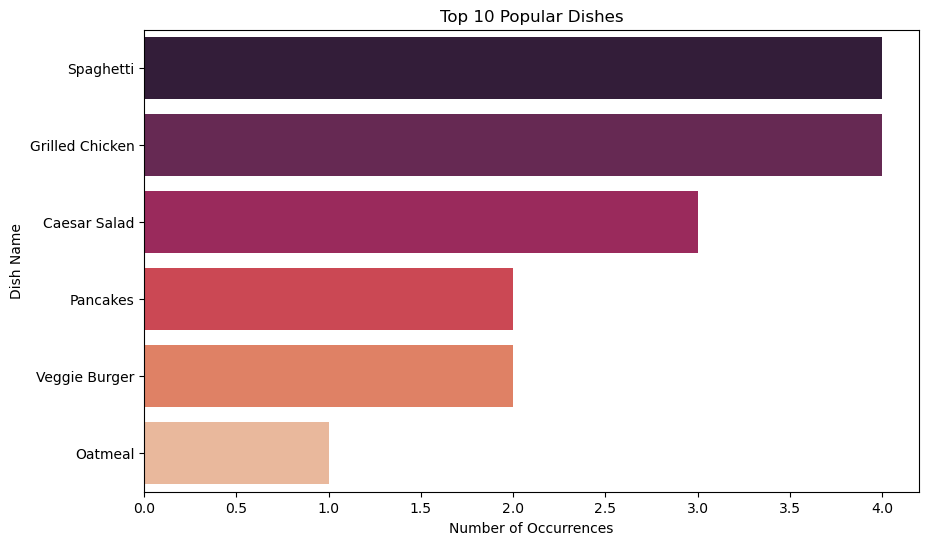

In [15]:
# Identifying popular dishes
popular_dishes = final_data['Dish Name_x'].value_counts().head(10)

# Plot: Top 10 Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='rocket')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Occurrences')
plt.ylabel('Dish Name')
plt.show()

C:\Users\jagadesh\AppData\Local\Temp\ipykernel_13688\2985869300.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_age_group = final_data.groupby('Age Group')['Order ID'].nunique()
C:\Users\jagadesh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


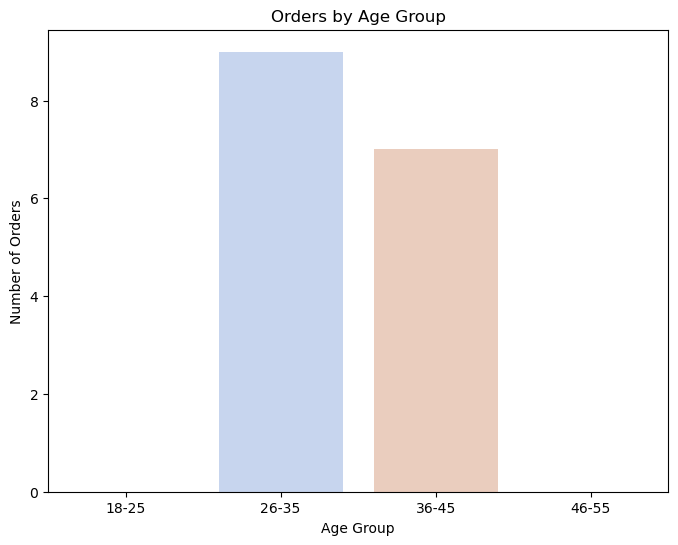

In [16]:
# Demographic analysis: Orders by age group
age_bins = [18, 25, 35, 45, 55]
age_labels = ['18-25', '26-35', '36-45', '46-55']
final_data['Age Group'] = pd.cut(final_data['Age'], bins=age_bins, labels=age_labels, right=False)
orders_by_age_group = final_data.groupby('Age Group')['Order ID'].nunique()

# Plot: Orders by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='coolwarm')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.show()

The analysis provides the following insights:

**Relationship Between Cooking Sessions and Orders:**

- A scatter plot illustrates the correlation between the number of cooking sessions and user orders, indicating levels of user engagement.

**Top Six Popular Dishes:**

- A bar chart displays the most frequently cooked dishes, reflecting user preferences.

**Orders By Age Group:**

- A bar chart represents the distribution of orders across different age groups, highlighting demographic trends.phic trends.